<h1>Missing Data</h1>
In this notebook I walk through some common techniques for identifying, visualizing, and working with missing data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
#Missingno is a package to visualize missing data
import missingno as msno
%matplotlib inline
#Load data
df = pd.read_csv('nba_2016_2017_100.csv')

Use DataFrame.describe() to see some descriptive statistics about the data.

In [3]:
display(df.head())
df.describe()

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PTS
0,201566,Russell Westbrook,OKC,28,81,46.0,35,107.9,NaN,26.54,31.6
1,1626246,Boban Marjanovic,DET,28,35,NaN,19,104.3,102.4,NaN,5.5
2,1627743,Demetrius Jackson,BOS,22,5,1.0,4,124.2,117.8,1.45,2.0
3,203076,Anthony Davis,NOP,24,75,31.0,44,104.2,102.5,22.12,28.0
4,201935,James Harden,HOU,27,81,54.0,27,113.6,107.3,26.50,29.1


,PLAYER_ID,AGE,GP,W,L,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PTS
count,1.000000e+02,100.000000,100.000000,77.000000,100.000000,100.000000,82.000000,81.000000,100.000000
mean,3.026027e+05,27.510000,62.440000,32.753247,29.420000,107.728000,105.986585,10.734469,15.174200
std,4.237828e+05,3.935066,21.261869,16.153178,12.726478,5.157324,4.297710,8.740211,7.319374
min,1.717000e+03,20.000000,2.000000,0.000000,1.000000,86.800000,93.000000,0.310000,1.500000
25%,2.011780e+05,25.000000,55.500000,23.000000,21.000000,104.275000,103.775000,2.240000,9.225000
50%,2.023305e+05,27.000000,72.000000,36.000000,30.500000,107.150000,106.000000,9.560000,14.550000
75%,2.034582e+05,30.000000,77.000000,44.000000,37.250000,110.275000,108.400000,18.310000,20.650000
max,1.627848e+06,39.000000,82.000000,65.000000,55.000000,124.200000,118.300000,30.960000,31.600000


We can use missingno to visualize how much of the data is missing and if there are correlations between occurrences of missing values.

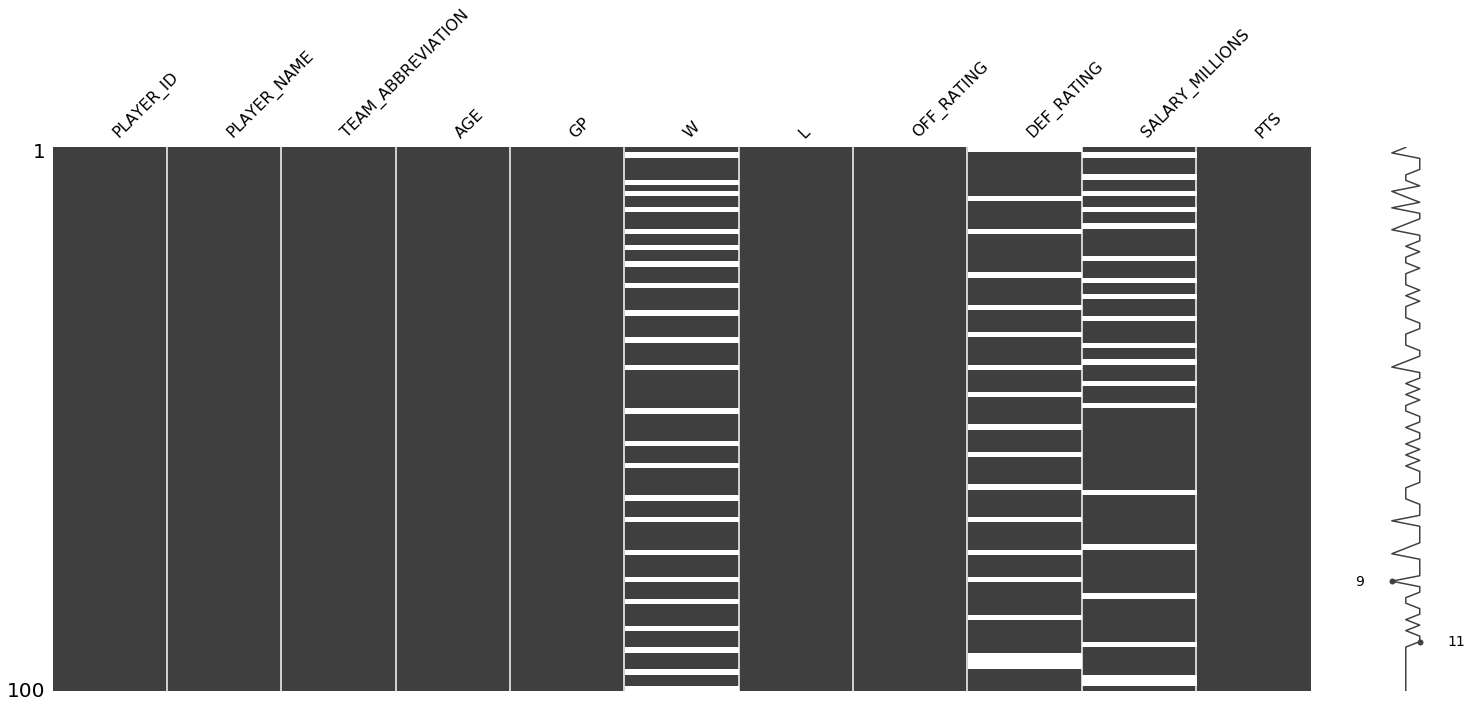

In [4]:
msno.matrix(df)

Missingno provides a quick visualization to see which columns contain missing data.

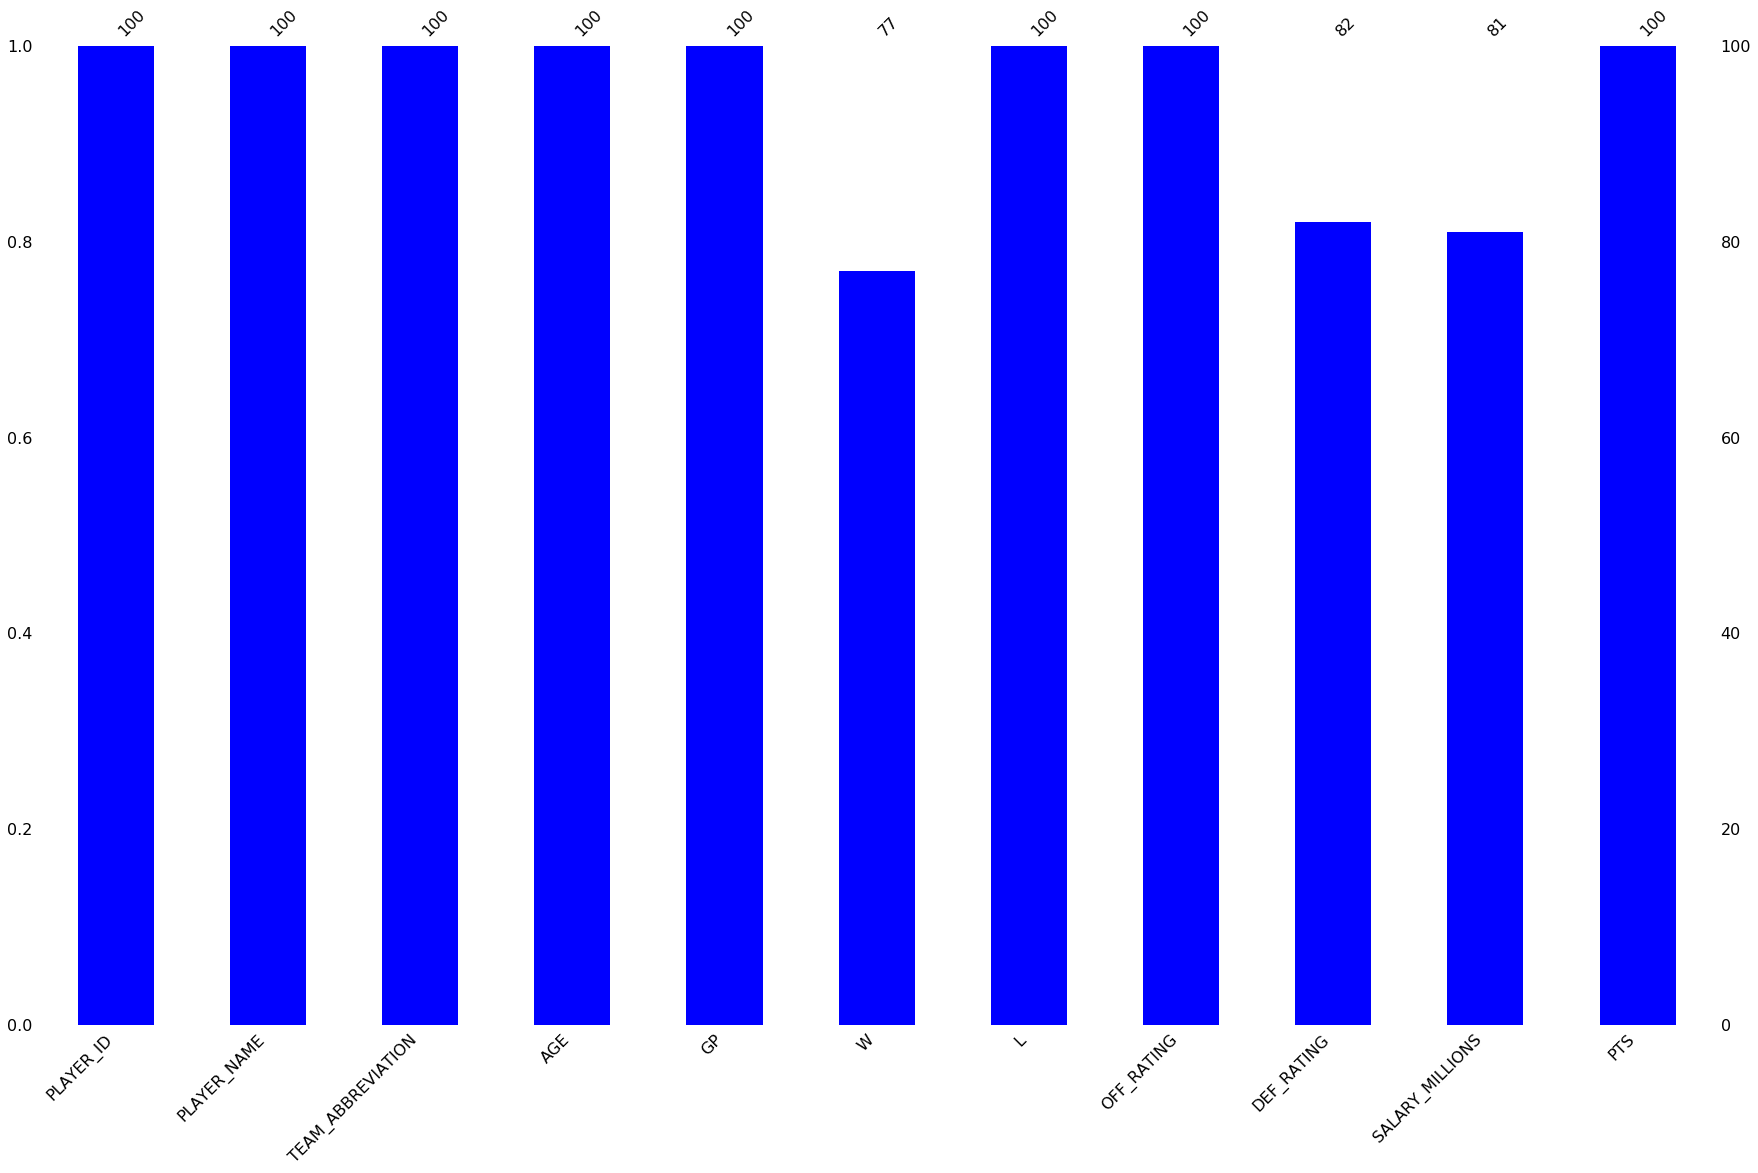

In [5]:
msno.bar(df, color="blue", figsize=(30,18))

From these visualizations we can see that roughly 20% of some columns are missing. Out of only 100 points this is a significant amount of data and will likely impact our models.

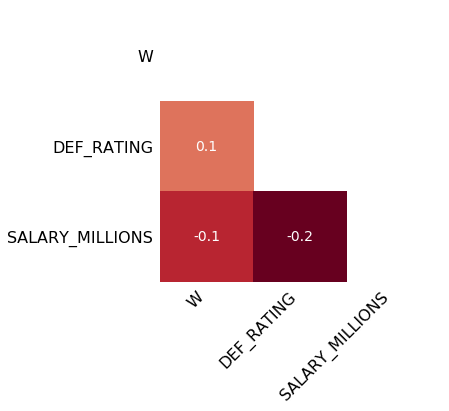

In [6]:
msno.heatmap(df, figsize=(5,5))

Here we look for correlations between instances of missing data. In this data the instances of missing data appear uncorrelated with each other. Here a score of -1 means that when one point is missing the other is not missing, while a score of 1 means that when one point is missing the other is also missing.

<h2>Case Deletion</h2>
Often the simplest approach to dealing with missing data is to drop the entire row.

In [7]:
df_new = df.dropna()
display(df_new.describe())
display(df.describe())

,PLAYER_ID,AGE,GP,W,L,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PTS
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.494186e+05,27.270833,56.083333,30.416667,25.666667,107.858333,105.804167,8.677500,14.577500
std,4.931332e+05,4.597592,24.762560,17.420743,12.066012,5.787104,4.605222,8.138725,7.791711
min,1.717000e+03,21.000000,2.000000,0.000000,1.000000,86.800000,93.000000,0.310000,1.500000
25%,2.013788e+05,23.750000,45.250000,15.250000,18.750000,104.350000,104.000000,1.525000,8.425000
50%,2.027200e+05,26.500000,64.500000,32.500000,29.000000,107.650000,106.000000,5.535000,14.150000
75%,2.039508e+05,30.250000,75.000000,42.250000,35.000000,110.850000,108.200000,12.415000,20.150000
max,1.627848e+06,39.000000,82.000000,65.000000,51.000000,124.200000,118.300000,26.500000,29.100000


,PLAYER_ID,AGE,GP,W,L,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PTS
count,1.000000e+02,100.000000,100.000000,77.000000,100.000000,100.000000,82.000000,81.000000,100.000000
mean,3.026027e+05,27.510000,62.440000,32.753247,29.420000,107.728000,105.986585,10.734469,15.174200
std,4.237828e+05,3.935066,21.261869,16.153178,12.726478,5.157324,4.297710,8.740211,7.319374
min,1.717000e+03,20.000000,2.000000,0.000000,1.000000,86.800000,93.000000,0.310000,1.500000
25%,2.011780e+05,25.000000,55.500000,23.000000,21.000000,104.275000,103.775000,2.240000,9.225000
50%,2.023305e+05,27.000000,72.000000,36.000000,30.500000,107.150000,106.000000,9.560000,14.550000
75%,2.034582e+05,30.000000,77.000000,44.000000,37.250000,110.275000,108.400000,18.310000,20.650000
max,1.627848e+06,39.000000,82.000000,65.000000,55.000000,124.200000,118.300000,30.960000,31.600000


As evidenced by the summary statistics, this can change the distribution of the data for a given feature.

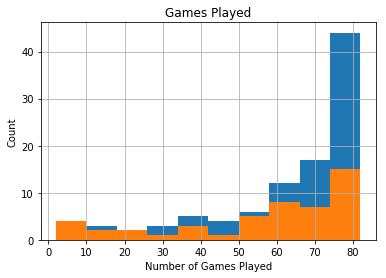

In [8]:
df['GP'].hist()
df_new['GP'].hist()
plt.title('Games Played')
plt.xlabel('Number of Games Played')
plt.ylabel('Count')
plt.show()

<h2>Statistical Imputation</h2>
Data can be imputed using statistical measures or using regression.

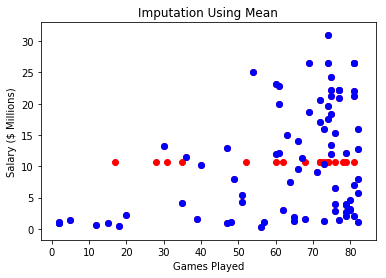

In [9]:
impute = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
salary = df['SALARY_MILLIONS'].values
gp = df['GP'].values
salary_mean = impute.fit_transform(salary.reshape(-1,1)).reshape(1,-1)[0]
plt.scatter(gp,salary_mean,c='r')
plt.scatter(gp,salary,c='b')
plt.xlabel('Games Played')
plt.ylabel('Salary ($ Millions)')
plt.title('Imputation Using Mean')
plt.show()

Let's try imputation using regression. I hypothesize that games play and salary are correlated and use games played to impute the missing values for salary.

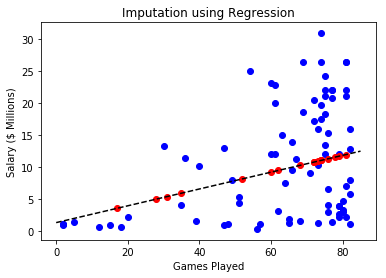

In [10]:
linear_model = LinearRegression()
result = linear_model.fit(df_new['GP'].values.reshape(-1,1),df_new['SALARY_MILLIONS'].values)
xvals = np.arange(0,90,5)
missing_salaries_GP = df[df['SALARY_MILLIONS'].isnull()]['GP'].values
imputed_salaries = result.predict(missing_salaries_GP.reshape(-1,1))
plt.plot(xvals,result.predict(xvals.reshape(-1,1)),'k--')
plt.scatter(df['GP'].values,df['SALARY_MILLIONS'].values,c='b')
plt.scatter(missing_salaries_GP,imputed_salaries,c='r')
plt.xlabel('Games Played')
plt.ylabel('Salary ($ Millions)')
plt.title('Imputation using Regression')
plt.show()

But we can do better. This doesn't take into account the scatter in the data. We can add noise based on the variance in the residuals.

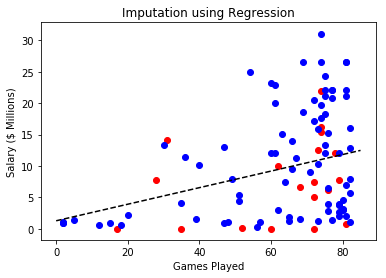

In [11]:
#Calculate residuals
residuals = df_new['SALARY_MILLIONS'].values-result.predict(df_new['GP'].values.reshape(-1,1))
var_fit = np.std(residuals)
#Add noise
imputed_salaries_noise = []
for item in imputed_salaries:
    imputed_salaries_noise.append(max(0,np.random.normal(loc=item,scale=var_fit)))
plt.plot(xvals,result.predict(xvals.reshape(-1,1)),'k--')
plt.scatter(missing_salaries_GP,imputed_salaries_noise,c='r')
plt.scatter(df['GP'].values,df['SALARY_MILLIONS'].values,c='b')
#plt.scatter(missing_salaries_GP,imputed_salaries_noise,c='r')
plt.xlabel('Games Played')
plt.ylabel('Salary ($ Millions)')
plt.title('Imputation using Regression')
plt.show()

<h2>Machine Learning Based Imputation</h2>
Data can be imputed using machine learning based models like k-Nearest Neighbors.

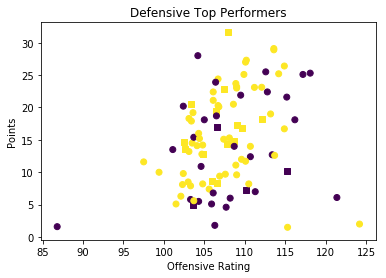

In [12]:
#Turn defensive ratings into class labels
df_class = df[['OFF_RATING','DEF_RATING','PTS']].dropna()
offensive_rating = df_class['OFF_RATING'].values
defensive_rating = df_class['DEF_RATING'].values
points = df_class['PTS'].values
defensive_class = []
for i in range(len(offensive_rating)):
    if defensive_rating[i] > 105:
        defensive_class.append(1)
    elif defensive_rating[i] <= 105:
        defensive_class.append(0)

classifier = KNeighborsClassifier(n_neighbors=3)
class_result = classifier.fit(np.stack((offensive_rating,points),axis=1),defensive_class)
#Find missing data
missing_def_rating = df[df['DEF_RATING'].isnull()][['OFF_RATING','PTS']].values
#Predict
predicted_def_rating = class_result.predict(missing_def_rating)
plt.scatter(missing_def_rating[:,0],missing_def_rating[:,1],c=predicted_def_rating,marker='s')
plt.scatter(offensive_rating,points,c=defensive_class)
plt.title('Defensive Top Performers')
plt.xlabel('Offensive Rating')
plt.ylabel('Points')
plt.show()

In this plot the squares represent points with class labels predicted by their nearest neighbours. Purple points are below average defensive rankings while yellow points are above average defensive rankings.

<h2>Multiple Imputation</h2>
There are some python packages that will do multiple imputation for us. In particular they apply the <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/">MICE</a> algorithm. Statsmodels has an implementation of the MICE algorithm that I'll try to use and see how it works.

/Users/christopherluciuk/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: MICE
=============================================================
Method:              MICE             Sample size:      100  
Model:               OLS              Scale             63.14
Dependent variable:  SALARY_MILLIONS  Num. imputations  10   
-------------------------------------------------------------
          Coef.  Std.Err.   t    P>|t|   [0.025 0.975]  FMI  
-------------------------------------------------------------
Intercept 0.6834   2.5867 0.2642 0.7916 -4.3865 5.7532 0.0836
GP        0.1656   0.0399 4.1515 0.0000  0.0874 0.2438 0.1132
=============================================================

"""

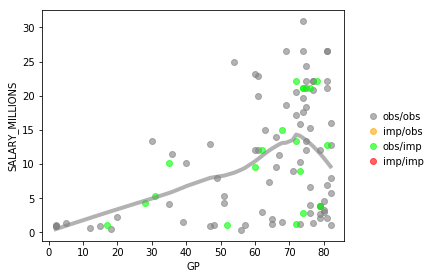

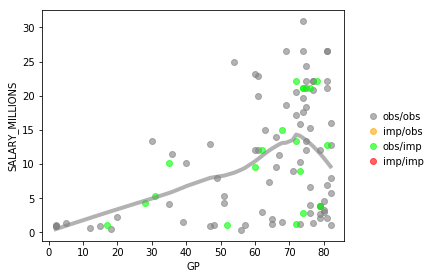

In [15]:
from statsmodels.imputation import mice
import statsmodels as sm
#Create mice data instance
imp = mice.MICEData(df[['GP','SALARY_MILLIONS']])
#Linear model
fml = 'SALARY_MILLIONS ~ GP'
#Build MICE pipeline
out = mice.MICE(fml, sm.regression.linear_model.OLS, imp)
#Fit with burn in of 3 and 10 imputations
results = out.fit(3,10)
#Output results
display(results.summary())
#plot
imp.plot_bivariate('GP','SALARY_MILLIONS')